# Workflow overview fig

In [1]:
import numpy as np
import networkx as nx
from dwdynamics import helpers, instance
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from scipy.stats import linregress
import dwave_networkx as dnx
import pandas as pd
import numpy as np
from matplotlib.lines import Line2D
import dimod
import math
import minorminer

helpers.set_pub_style(scale=1.0, fontsize=18)

ArgumentError: ArgumentError: Package numpy not found in current path.
- Run `import Pkg; Pkg.add("numpy")` to install the numpy package.

In [2]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle

fig = plt.figure(figsize=(16, 8))
gs = gridspec.GridSpec(
    2, 4, height_ratios=[1, 1.2], hspace=0.4, wspace=0.3, width_ratios=[1.2, 1, 1, 1.2]
)

ax1 = fig.add_subplot(gs[0, 0:2])
ax2 = fig.add_subplot(gs[0, 2:4])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1:3])
ax5 = fig.add_subplot(gs[1, 3])

# axes = [ax1, ax2, ax3, ax4, ax5]
# for ax in axes:
# ax.axis('off')

ax3.text(
    0.5, 1.1, "(a)", ha="center", va="center", fontsize=16, transform=ax1.transAxes
)
ax3.text(
    0.5, 1.1, "(b)", ha="center", va="center", fontsize=16, transform=ax2.transAxes
)
ax3.text(
    0.5, 1.1, "(c)", ha="center", va="center", fontsize=16, transform=ax3.transAxes
)
ax4.text(
    0.7, 1.1, "(d)", ha="center", va="center", fontsize=16, transform=ax4.transAxes
)

######################### ax1 - schematic of time evolution #########################
ax = ax1
ax.axis("off")

x0, y0 = 0.2, 0.5  # psi_0
x1, y1 = 2.0, 0.5  # H(t) box
x2, y2 = 3.8, 0.5  # psi(t)

# Draw psi_0
ax.text(x0, y0, r"$|\psi_0\rangle$", fontsize=18, va="center", ha="center")

# Draw H(t) box
box_width = 1.0
box_height = 0.5
H_box = Rectangle(
    (x1 - box_width / 2, y1 - box_height / 2),
    box_width,
    box_height,
    edgecolor="black",
    facecolor="white",
)
ax.add_patch(H_box)
ax.text(x1, y1, r"$H(t)$", fontsize=18, va="center", ha="center")

# Draw psi(t)
ax.text(x2, y2, r"$|\psi(t)\rangle$", fontsize=18, va="center", ha="center")

# Arrows (shorter)
ax.annotate(
    "",
    xy=(x1 - box_width / 2 - 0.05, y1),
    xytext=(x0 + 0.25, y0),
    arrowprops=dict(arrowstyle="->", lw=1.2),
)
ax.annotate(
    "",
    xy=(x2 - 0.25, y2),
    xytext=(x1 + box_width / 2 + 0.05, y1),
    arrowprops=dict(arrowstyle="->", lw=1.2),
)

# Schrödinger equation above
ax.text(
    x1 + 0.1,
    y1 + 0.8,
    r"$\frac{\partial}{\partial t}|\psi(t)\rangle = H(t)|\psi(t)\rangle$",
    fontsize=20,
    va="center",
    ha="center",
)

# Time evolution label
ax.text(x1, y1 - 0.65, "Time evolution", fontsize=18, va="center", ha="center")

# Adjust limits tightly to content
ax.set_xlim(0.2, 4.3)
ax.set_ylim(-0.2, 1.6)

################################# ax2 - schematic of sliced propagator #########################
ax = ax2
# Czas i fala
t = np.linspace(0, 4, 1000)
psi = np.cos(np.pi * t / 2)  # fala zaczyna w 1, potem 0, -1, 0, 1

# Hamiltonian: zmienia się co 1 jednostkę czasu
hamiltonian_values = [1, 0, -1, 0]
color_map = {1: "#ffcccc", 0: "#99bbdd", -1: "#cceeff"}
t_strobe = np.arange(0, 5)

ax.plot(t, psi, color="black", linewidth=1.5, label=r"$\psi(t)$")
# Kolorowe tła i ewolucje jednostkowe
for i in range(len(t_strobe) - 1):
    x_start = t_strobe[i]
    x_end = t_strobe[i + 1]
    h_val = hamiltonian_values[i]
    ax.axvspan(x_start, x_end, color=color_map[h_val], alpha=0.5)
    ax.axvline(x_start, color="gray", linestyle="--", linewidth=0.7)

    y_pos = -1.4 + 0.1 * (i % 2)
    ax.annotate(
        "",
        xy=(x_end, y_pos),
        xytext=(x_start, y_pos),
        arrowprops=dict(arrowstyle="->", color="black", linewidth=1),
    )
    ax.text(
        (x_start + x_end) / 2,
        y_pos + 0.15,
        r"$U(t_{%d}, t_{%d})$" % (i + 1, i),
        ha="center",
        fontsize=18,
    )

# Ostatnia linia
ax.axvline(t_strobe[-1], color="gray", linestyle="--", linewidth=0.7)

# Punkty stroboskopowe
psi_strobe = np.cos(np.pi * t_strobe / 2)
ax.plot(t_strobe, psi_strobe, "o", color="black")

# Opisy osi
ax.set_xlabel(r"Time step $t_n$", fontsize=18)
ax.set_ylabel(r"Expectation value $\langle \sigma_z \rangle$", fontsize=18)
ax.set_xticks(np.arange(0, 5, 1))
ax.set_yticks([-1, 0, 1])
ax.set_ylim(-1.5, 1.5)
ax.set_xlim(-0.05, 4.05)

######################### ax3 - schematic of clock hamiltonian #########################
ax = ax3
ax.axis("off")
# Matrix entries using LaTeX for math formatting
matrix = [
    [r"$2\hat{I}$", r"$\hat{U}^\dagger(t_1,t_0)$", r"$0$", r"$0$"],
    [r"$\hat{U}(t_1,t_0)$", r"$2\hat{I}$", r"$\hat{U}^\dagger(t_2,t_1)$", r"$0$"],
    [r"$0$", r"$\hat{U}(t_2,t_1)$", r"$2\hat{I}$", r"$\hat{U}^\dagger(t_3,t_2)$"],
    [r"$0$", r"$0$", r"$\hat{U}(t_3,t_2)$", r"$\hat{I}$"],
]

colors = [
    ["#f4c2ff", "#ffcccc", "#ffffff", "#ffffff"],
    ["#ffcccc", "#f4c2ff", "#99bbdd", "#ffffff"],
    ["#ffffff", "#99bbdd", "#f4c2ff", "#cceeff"],
    ["#ffffff", "#ffffff", "#cceeff", "#f4c2ff"],
]

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

# Draw cells with colors and LaTeX text
for i in range(4):
    for j in range(4):
        rect = Rectangle(
            (j, 3 - i), 1, 1, facecolor=colors[i][j], edgecolor="black", linewidth=1.5
        )
        ax.add_patch(rect)
        ax.text(
            j + 0.5, 3 - i + 0.5, matrix[i][j], ha="center", va="center", fontsize=12
        )
ax.text(2, -0.5, r"Clock Hamiltonian $C$", fontsize=18, ha="center")
############################ ax4 - diagram ##########################
ax = ax4
ax.axis("off")
from matplotlib.patches import FancyArrowPatch
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from pdf2image import convert_from_path
from PIL import Image

# Load and resize PNG images
dwave_img = Image.open("../plots/dwave.jpg")
velox_img = Image.open("../plots/gpu.png")

# Convert PDFs to images
input_img = convert_from_path("../plots/input.pdf", dpi=150)[0]


# Arrows with clip_on=False and padding for visibility
arrow1 = FancyArrowPatch(
    (3.5, 2.1),
    (10, 2.7),
    connectionstyle="arc3,rad=0.2",
    arrowstyle="-|>",
    mutation_scale=20,
    color="blue",
    linewidth=2,
    clip_on=False,
)
arrow2 = FancyArrowPatch(
    (3.5, 1.9),
    (10, 1.3),
    connectionstyle="arc3,rad=-0.2",
    arrowstyle="-|>",
    mutation_scale=20,
    color="green",
    linewidth=2,
    clip_on=False,
)
ax.add_patch(arrow1)
ax.add_patch(arrow2)

# Labels
ax.text(3.8, 2.7, "D-Wave QPU", fontsize=16, color="blue", weight="bold")
ax.text(3.8, 1.1, "VeloxQ", fontsize=16, color="green", weight="bold")

# Input image
input_box = OffsetImage(input_img, zoom=0.34)
input_ab = AnnotationBbox(input_box, (1.2, 2), frameon=False, pad=0.3)
ax.add_artist(input_ab)


# D-Wave image (small, under arrow)
dwave_box = OffsetImage(dwave_img, zoom=0.1)
dwave_ab = AnnotationBbox(dwave_box, (8, 3.3), frameon=False, pad=0.1)
ax.add_artist(dwave_ab)

# # Velox GPU image (small, under arrow)
velox_box = OffsetImage(velox_img, zoom=0.2)
velox_ab = AnnotationBbox(velox_box, (7.9, 0.7), frameon=False, pad=0.1)
ax.add_artist(velox_ab)

# Set limits to ensure clean framing
ax.set_xlim(0, 10.5)
ax.set_ylim(0, 4)

############################ ax5 - example dynamics #########################
ax = ax5
import qutip as qp

system = 3

tp_pairs = [(3, 3)]
# We simulate evolution under the Hamiltonian 1/2 pi * Sigma_y...

# Loop over all rows in velox_results and plot all dynamics on the same panel,
# coloring each curve according to its best_energy.
colors = ["r", "g", "b", "c", "m", "y", "k"]
markers = ["o", "s", "^", "D", "v", "<", ">"]

SY = np.array([[0, -1.0j], [1.0j, 0.0]])
PSI0 = np.array(
    [1, 0], dtype=np.complex128
)  # Difference b. Initial state can now be complex.

system_latex_dict = {
    1: "H = $\\frac{\\pi}{2}\\sigma_y$",
    3: "one qubit pt symmetric system (seed=1)",
    4: "maximally entangled 2 qubit system",
}

for i, (timepoints, precision) in enumerate(tp_pairs):

    s = helpers.get_dwave_sample_set(system, timepoints)
    inst = instance.Instance(system)
    inst.create_instance(precision, timepoints)
    H = inst.H
    PSI0 = inst.psi0
    dim = int(math.log2(H.shape[0]))  # dim=2

    print(H.shape)

    # psi_0 = qp.tensor(qp.basis(2, 0), qp.basis(2, 1))
    times = np.linspace(0, timepoints - 1, 100)
    baseline = qp.mesolve(qp.Qobj(H), qp.Qobj(PSI0), times, e_ops=[qp.sigmaz()]).expect

    ax.plot(times, baseline[0], "k--", label="|00>")

    problem = inst.problem

    sample = s.first.sample
    sample_energy = s.first.energy
    vec = problem.interpret_sample(sample)

    expect_00 = [(state.conj() @ qp.sigmaz().full() @ state).real for state in vec]

    ax.plot(
        problem.times,
        expect_00,
        label=f"|00> Energy: {round(sample_energy,4)}",
        marker="o",
        markersize=15,
        linestyle="None",
        alpha=1.0,
        color="red",
    )
    #  ax.scatter(problem.times, expect_11, color='black', marker=markers[j % len(markers)],label=f"|11> Energy: {sample_energy,4)}", alpha=1.0, s=100)

    # ax.plot(problem.times, expect, color=colors[j % len(colors)], alpha=0.5, linewidth=0.1)
    ax.set_xlabel(r"Time step $t_n$", fontsize=18)
    ax.set_ylabel(r"Expectation value $\langle \sigma_z \rangle$", fontsize=18)
# fig.suptitle(f"Advantage {topology} " +rf"evolution of {system} ",fontsize=16)
ax.set_xticks(np.arange(0, timepoints, 1))  # Show all integer timepoints as xticks

plt.savefig("../../plots/workflow_overview.pdf", bbox_inches="tight", dpi=300)
plt.show()

ArgumentError: ArgumentError: Package matplotlib not found in current path.
- Run `import Pkg; Pkg.add("matplotlib")` to install the matplotlib package.

## Embedding + dwave results fig

NameError: name 'instance' is not defined

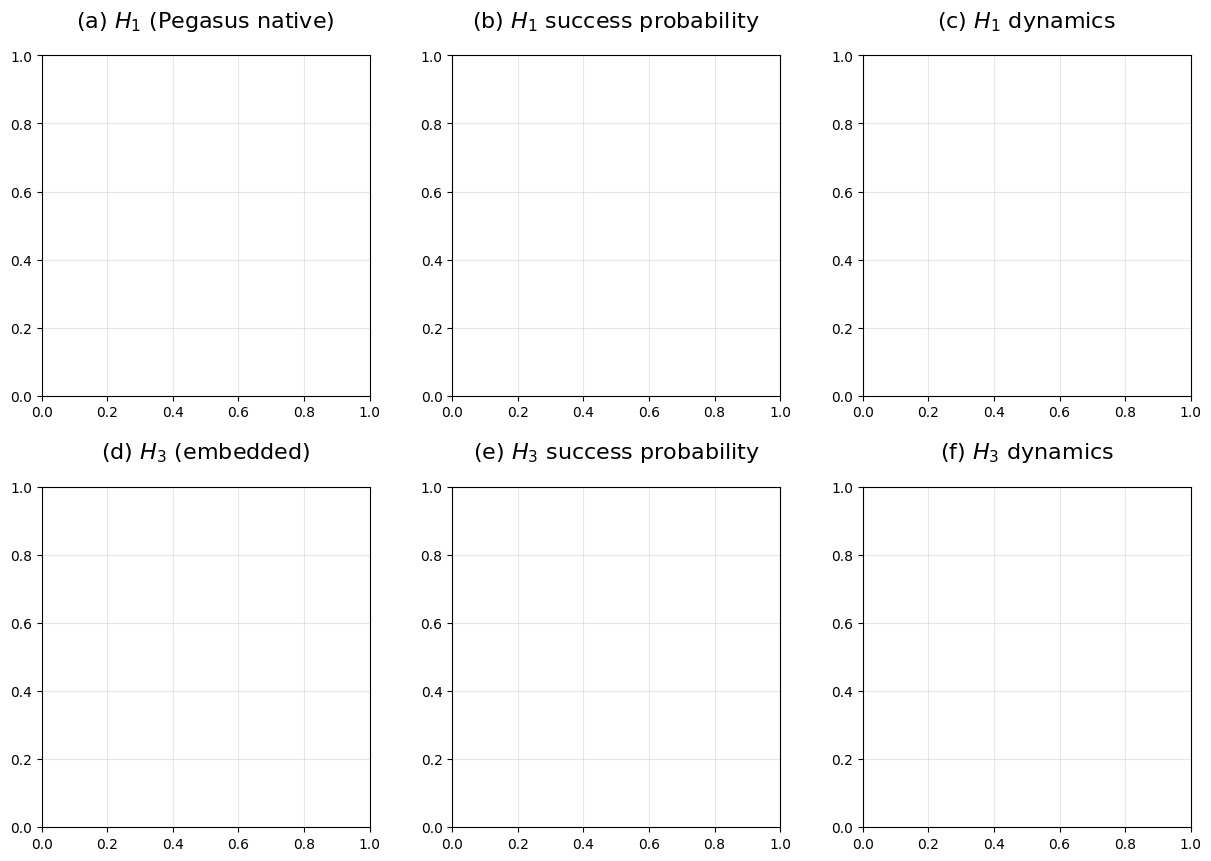

In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

# Create figure with 2 rows and 3 columns of square panels

fig = plt.figure(
    figsize=(12, 8.5), constrained_layout=True
)  # Adjust figure size as needed
gs = gridspec.GridSpec(
    2,
    3,
    figure=fig,
    hspace=0.05,
    wspace=0.1,
    height_ratios=[1, 1],
    width_ratios=[1, 1, 1],
)

# Create subplots for each panel
axes = []
for i in range(2):
    for j in range(3):
        ax = fig.add_subplot(gs[i, j])
        axes.append(ax)
        ax.grid(True, alpha=0.3)
axes[0].text(
    0.5,
    1.1,
    r"(a) $H_1$ (Pegasus native)",
    ha="center",
    va="center",
    fontsize=16,
    transform=axes[0].transAxes,
)
axes[3].text(
    0.5,
    1.1,
    r"(d) $H_3$ (embedded)",
    ha="center",
    va="center",
    fontsize=16,
    transform=axes[3].transAxes,
)
axes[1].text(
    0.5,
    1.1,
    r"(b) $H_1$ success probability",
    ha="center",
    va="center",
    fontsize=16,
    transform=axes[1].transAxes,
)
axes[4].text(
    0.5,
    1.1,
    r"(e) $H_3$ success probability",
    ha="center",
    va="center",
    fontsize=16,
    transform=axes[4].transAxes,
)
axes[2].text(
    0.5,
    1.1,
    r"(c) $H_1$ dynamics",
    ha="center",
    va="center",
    fontsize=16,
    transform=axes[2].transAxes,
)
axes[5].text(
    0.5,
    1.1,
    r"(f) $H_3$ dynamics",
    ha="center",
    va="center",
    fontsize=16,
    transform=axes[5].transAxes,
)

################# Left column - embeddings ###################
# ------------ top -------------------
system = 1
inst = instance.Instance(system)
inst.create_instance(precision=2, number_time_points=3)
G = dimod.to_networkx_graph(inst.qubo)
hw = dnx.pegasus_graph(4)
embed = minorminer.find_embedding(
    inst.qubo.quadratic, list(hw.edges()), random_seed=532
)
dnx.draw_pegasus_embedding(
    hw, embed, with_labels=False, node_size=50, crosses=False, ax=axes[0]
)
# axes[0].axis('on')

# ------------ bottom -------------------
system = 3
inst = instance.Instance(system)
inst.create_instance(precision=3, number_time_points=3)
G = dimod.to_networkx_graph(inst.qubo)
hw = dnx.pegasus_graph(4)
embed = minorminer.find_embedding(inst.qubo.quadratic, list(hw.edges()), random_seed=42)
dnx.draw_pegasus_embedding(
    hw, embed, with_labels=False, node_size=50, crosses=False, ax=axes[3]
)

############## Middle column - dwave success probability ##################
import pandas as pd

annealing_times = [10, 100, 200, 500]
timepoints_of_interest = [2, 3]
topologies = ["1.4", "6.4"]
solver_names = {
    "1.4": "Advantage2 1.4",
    "6.4": "Advantage 6.4",
}
systems = [1, 3]

colors = {2: "tab:blue", 3: "tab:orange"}
linestyles = {"1.4": "dashed", "6.4": "solid"}
markers = {"1.4": "o", "6.4": "^"}

subaxes = [axes[1], axes[4]]
for ii, system in enumerate(systems):
    ax = subaxes[ii]
    data = {tp: {t: [] for t in timepoints_of_interest} for tp in topologies}
    for topology in topologies:
        for ta in annealing_times:
            df = helpers.get_dwave_success_rates(
                system, topology=topology, ta=ta, grouped=True, file_limit=20
            )
            df = df[df["timepoints"].isin(timepoints_of_interest)]
            for tp in timepoints_of_interest:
                val = df[df["timepoints"] == tp]["success_prob"].values
                data[topology][tp].append(val[0] if len(val) > 0 else None)

    for topology in topologies:
        for tp in timepoints_of_interest:
            tas = [
                ta for i, ta in enumerate(annealing_times) if data[topology][tp][i] > 0
            ]
            data[topology][tp] = [p for p in data[topology][tp] if p > 0]
            ax.plot(
                tas,
                data[topology][tp],
                label=rf"{solver_names[topology]}, $ N = {tp}$",
                color=colors[tp],
                linestyle=linestyles[topology],
                marker=markers[topology],
            )

    ax.set_xlabel(r"Annealing time [$\mu$s]", fontsize=18)
    ax.set_yscale("log")
    ax.grid(True)

    ax.set_xticks([0, 100, 200, 300, 400, 500])

    ax.set_ylabel("Success probability $P_s$", fontsize=18)
    if system == 1:
        ax.legend(
            loc="lower left",
            fontsize=13,
            fancybox=True,
            shadow=True,
            framealpha=1.0,
            # mode="expand",
            alignment="center",
            bbox_to_anchor=(0.05, 0.05),
        )
        ax.set_ylim(5e-3, 1)
    if system == 3:
        ax.set_ylim(1e-4, 1)

################ Right column - dynamics ##################
# -------------- top -------------------

SZ = np.array([[1, 0], [0, -1]])
colors = ["r", "g", "b", "c", "m", "y", "k"]
markers = ["s", "o", "^", "D", "v", "<", ">"]
tp = 3
prec = [2, 3]
subaxes = [axes[2], axes[5]]
for j, system in enumerate([1, 3]):

    ax = subaxes[j]
    i = instance.Instance(system)

    i.create_instance(precision=prec[j], number_time_points=tp)
    qubo = i.problem.qubo()
    problem = i.problem
    times = np.linspace(0, len(problem.times) - 1, 100)

    baseline = qp.mesolve(
        qp.Qobj(problem.hamiltonian),
        qp.Qobj(problem.initial_state),
        times,
        e_ops=[qp.sigmaz()],
    ).expect[0]
    ax.plot(times, baseline, "k--")
    dw_result = helpers.get_dwave_sample_set(system, timepoints=3)

    for idx, sample in enumerate(list(dw_result.samples(3))[::-1]):
        dw_vec = problem.interpret_sample(sample)
        dw_expect = [(state.conj() @ SZ @ state).real for state in dw_vec]
        energy = list(dw_result.to_pandas_dataframe()[0:3][::-1]["energy"])[idx]

        # axis.scatter(inst_obj.problem.times, exact_expect, marker="^", lw=2, s=300, edgecolors="b", facecolors="none", label="Exact solver")
        # axis.scatter(problem.times, sa_expect, marker="o", lw=2, s=100, edgecolors="r", facecolors="none", label="SA sampler")
        ax.scatter(
            problem.times,
            dw_expect,
            color=colors[idx % len(colors)],
            marker=markers[idx % len(markers)],
            label=fr"$E={abs(energy):.2f}$",
            s=70,
        )
        ax.plot(
            problem.times,
            dw_expect,
            color=colors[idx % len(colors)],
            alpha=0.5,
            linewidth=0.3,
        )
        ax.set_xlabel(r"Time step $t_n$", fontsize=18)
        ax.legend(loc="best", fontsize=13, framealpha=1.0, fancybox=True, shadow=True, handlelength=1)

        ax.set_ylabel(r"Expectation value $\langle \sigma_z \rangle$", fontsize=18)


plt.savefig("../../plots/example_results.pdf", bbox_inches="tight", dpi=300)
plt.show()

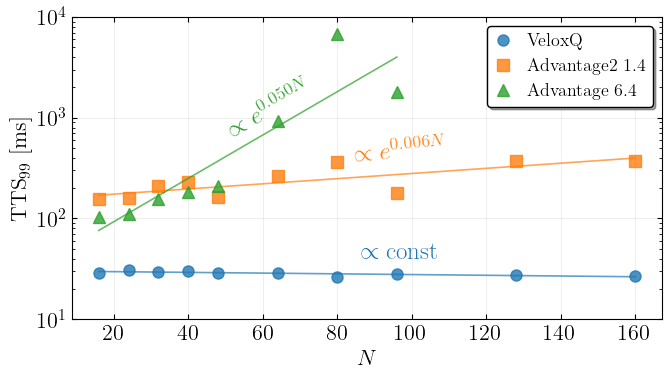

In [ ]:
fig, ax = plt.subplots(figsize=(7, 4))
colors = plt.cm.tab10.colors  # do 10 systemów
# systems = [i for i in range(1, 10)]
# systems = [2]
ALL_dfs = []
helpers.set_pub_style(fontsize=16)
native_systems = [1,2,5,6,7]

for idx, system in enumerate(native_systems):
    velox_tts = helpers.get_velox_tts(system)
    dwave_14_tts = helpers.get_dwave_tts(system, topology="1.4", file_limit=20)
    dwave_64_tts = helpers.get_dwave_tts(system, topology="6.4", file_limit=20)

    color = colors[idx % len(colors)]

    ALL_dfs.append(velox_tts)
    ALL_dfs.append(dwave_14_tts)
    ALL_dfs.append(dwave_64_tts)

sources = ["VELOX", "1.4", "6.4"]
linestyles = ["-", "-", "-"]
all_system_dfs = pd.concat(ALL_dfs, axis=0)
native_system_df = all_system_dfs[all_system_dfs.system.isin(native_systems)]

for i, source in enumerate(sources):
    native_system_df_filtered = native_system_df[native_system_df.source == source]
    
    # Group by num_var and calculate mean and std for tts99
    grouped = native_system_df_filtered.groupby('num_var')['tts99'].agg(['mean', 'std', 'count']).reset_index()
    
    # Filter out NaN/infinite values
    mask = np.isfinite(grouped['mean']) #& np.isfinite(grouped['std'])
    grouped_clean = grouped[mask]
    
    num_var_clean = np.array(grouped_clean['num_var'])
    tts99_mean = np.array(grouped_clean['mean'])
    tts99_std = np.array(grouped_clean['std'])
    
    # Handle cases where std is NaN (only one data point)
    tts99_std = np.where(np.isnan(tts99_std), 0, tts99_std)
    
    # Plot with error bars
    # ax.errorbar(
    #     num_var_clean,
    #     tts99_mean,
    #     yerr=tts99_std,
    #     marker=["o", "s", "^"][i],
    #     linestyle="",
    #     color=colors[i],
    #     capsize=3,
    #     capthick=1,
    #     label=["VeloxQ", "Advantage2 1.4", "Advantage 6.4"][i]
    # )
     
    # Plot without error bars
    ax.plot(
        num_var_clean,
        tts99_mean,
        marker=["o", "s", "^"][i],
        linestyle="",
        color=colors[i],
        label=["VeloxQ", "Advantage2 1.4", "Advantage 6.4"][i],
        markersize=8,
        alpha=0.8,
    )
    
    # Fit exponential trend to averaged data
    if len(num_var_clean) > 1:
        log_tts99_mean = np.log(tts99_mean)
        slope, intercept, r_value, p_value, std_err = linregress(num_var_clean, log_tts99_mean)
        
        r_TTS99 = slope
        D = np.exp(intercept)
        
        # Generate smooth curve for fit
        num_var_fit = np.linspace(num_var_clean.min(), num_var_clean.max(), 100)
        TTS99_fit = D * np.exp(r_TTS99 * num_var_fit)
        ax.plot(
            num_var_fit, TTS99_fit, linestyle=linestyles[i], color=colors[i], alpha=0.7
        )
        
        mid_x = 1.1 * (num_var_clean.min() + num_var_clean.max()) / 2
        mid_y = D * np.exp(r_TTS99 * mid_x)
        
        # Offset annotation slightly above the line
        offset_factor = 1.5 if i == 0 else (2.0 if i == 1 else 0.7)
        
        # Format the equation
        eq_text = rf"$\propto e^{{{r_TTS99:.3f}  N}}$" if abs(r_TTS99) > 0.001 else rf"$\propto \mathrm{{const}}$"
        
        ax.annotate(
            eq_text,
            xy=(mid_x, mid_y * [1.3, 1.2, 0.8][i]),
            fontsize=18,
            color=colors[i],
            rotation=[0, 5, 30][i],
            ha='center',
            va='bottom',
            # bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8, edgecolor=colors[i])
        )


# plt.legend()
ax.legend(loc="best", fontsize=13, framealpha=1.0, fancybox=True, shadow=True, handlelength=1)
ax.set_xlabel(r"$N$")
ax.set_ylabel(r"$\mathrm{TTS}_{\rm 99}$ [ms]")
plt.yscale("log")
ax.grid(True)
plt.tight_layout()
plt.savefig(f"../../plots/tta_overview.pdf", bbox_inches="tight")
ax.set_ylim(1e1,1e4)
# ylims = ax.get_ylim()

plt.show()

Fitting Advantage 6.4 with 8 aggregated data points
Aggregated data: N=[16. 24. 32. 40. 48. 64. 80. 96.], TTS99_mean=[3.73667826e+00 8.89139543e+00 2.53950134e+01 6.10587000e+01
 2.17788564e+02 9.27689449e+02 2.53674002e+03 5.29842962e+03]
Fitting Advantage2 1.4 with 10 aggregated data points
Aggregated data: N=[ 16.  24.  32.  40.  48.  64.  80.  96. 128. 160.], TTS99_mean=[ 0.9356657   1.25307646  1.67515853  3.03607777  2.05039338  2.8557402
  6.83722202  6.09663135 18.19706023 56.24178509]


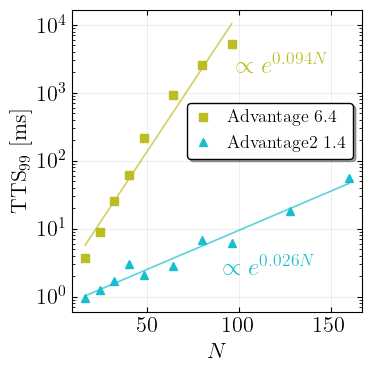

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))
colors = plt.cm.tab10.colors  # do 10 systemów
systems = [i for i in range(1,10)]
systems = [1,2,4,5,6,7]
ALL_dfs = []

for idx, system in enumerate(systems):
    df2_filtered = helpers.get_dwave_success_rates(system=system,ta=200,topology='6.4',file_limit=20)
    df3_filtered = helpers.get_dwave_success_rates(system=system,ta=200,topology='1.4',file_limit=20)

    # Dodajemy identyfikator źródła
    df2_filtered['source'] = 'Advantage'
    df3_filtered['source'] = 'Advantage2'

    # Łączymy oba DataFrame'y
    combined = pd.concat([df2_filtered,df3_filtered])
    # Reset indeksu do kolumn
    combined = combined.reset_index()
    combined =combined[combined.timepoints.isin([2,3,4,5])]
    # Tworzymy etykiety X
    combined['system'] = system
    combined['x_label'] = combined['precision'].astype(str) + '\n' + combined['timepoints'].astype(str)
    combined['tts99'] = combined.apply(lambda row: helpers.return_tts(row['success_prob'],row.runtime),axis=1)
    df = combined.copy()
    
    advantage1 = df[df['source'] == 'Advantage'].dropna(subset=['num_var', 'tts99'])
    advantage2 = df[df['source'] == 'Advantage2'].dropna(subset=['num_var', 'tts99'])

    
    # Store data from each system for aggregation
    if idx == 0:  # Initialize on first system
        all_advantage1_data = advantage1.copy()
        all_advantage2_data = advantage2.copy()
    else:
        all_advantage1_data = pd.concat([all_advantage1_data, advantage1])
        all_advantage2_data = pd.concat([all_advantage2_data, advantage2])

# Aggregate data by num_var for both sources
linestyles = ['-','--']
all_dataframes = [all_advantage1_data, all_advantage2_data]
sources = ['Advantage 6.4', 'Advantage2 1.4']

# Option to plot with or without error bars
plot_with_error_bars = False  # Set to True to show error bars

for i, (source, df) in enumerate(zip(sources, all_dataframes)):
    # Group by num_var and calculate mean and std for tts99
    grouped = df.groupby('num_var')['tts99'].agg(['mean', 'std', 'count']).reset_index()
    
    # Filter out NaN/infinite values
    mask = np.isfinite(grouped['mean'])
    grouped_clean = grouped[mask]
    
    num_var_clean = np.array(grouped_clean['num_var'])
    tts99_mean = np.array(grouped_clean['mean'])
    tts99_std = np.array(grouped_clean['std'])
    
    # Handle cases where std is NaN (only one data point)
    tts99_std = np.where(np.isnan(tts99_std), 0, tts99_std)
    
    if plot_with_error_bars:
        # Plot with error bars
        ax.errorbar(
            num_var_clean,
            tts99_mean,
            yerr=tts99_std,
            marker=['s', '^'][i],
            linestyle="",
            color=colors[8 + i],
            capsize=3,
            capthick=1,
            label=source
        )
    else:
        # Plot without error bars (individual points)
        ax.plot(
            num_var_clean,
            tts99_mean,
            ['s', '^'][i], 
            color=colors[8 + i],
            label=source,
            # alpha=0.6
        )
    
    # Fit exponential trend to averaged data
    if len(num_var_clean) > 1:
        log_tts99_mean = np.log(tts99_mean)
        slope, intercept, r_value, p_value, std_err = linregress(num_var_clean, log_tts99_mean)
        
        r_TTS99 = slope
        D = np.exp(intercept)
        
        print(f"Fitting {source} with {len(num_var_clean)} aggregated data points")
        print(f"Aggregated data: N={num_var_clean}, TTS99_mean={tts99_mean}")
        
        TTS99_fit = D * np.exp(r_TTS99 * num_var_clean)
        plt.semilogy(num_var_clean, TTS99_fit, '-', color=colors[8 + i], alpha=0.7)
                
        mid_x = 1.1 * (num_var_clean.min() + num_var_clean.max()) / 2
        mid_y = D * np.exp(r_TTS99 * mid_x)
 
        eq_text = rf"$\propto e^{{{r_TTS99:.3f} N}}$" if abs(r_TTS99) > 0.001 else rf"$\propto \mathrm{{const}}$"
        
        ax.annotate(
            eq_text,
            xy=(mid_x * [2, 1.2][i], mid_y * [4, 0.2][i]),
            fontsize=18,
            color=colors[i + 8],
            rotation=[0, 0][i],
            ha='center',
            va='bottom',
            # bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8, edgecolor=colors[i])
        )

ax.legend(loc='center right', fontsize=13, framealpha=1.0, fancybox=True, shadow=True, handlelength=1, bbox_to_anchor=(1, 0.6))

ax.set_xlabel(r'$N$')
ax.set_ylabel(r'$\mathrm{TTS}_{\rm 99}$ [ms]')
ax.set_yscale('log')
#ax.set_ylim(ylims)
ax.grid(True)
plt.tight_layout()
plt.savefig(f'../../plots/tta_exponent_factor.pdf' ,bbox_inches='tight')
plt.show()